In [ ]:
# https://www.analyticsvidhya.com/blog/2022/07/scraping-imdb-reviews-in-python-using-selenium/
# https://annlyelonline.com/2020/11/02/the-marvel-cinematic-universe-movies-ranked-by-imdb/
# https://monkeylearn.com/sentiment-analysis/
# https://towardsdatascience.com/social-media-sentiment-analysis-in-python-with-vader-no-training-required-4bc6a21e87b8
# https://pub.towardsai.net/textblob-vs-vader-for-sentiment-analysis-using-python-76883d40f9ae
# https://editorial.rottentomatoes.com/guide/all-marvel-cinematic-universe-movies-ranked/
# https://pypi.org/project/vaderSentiment/
# https://medium.com/analytics-vidhya/sentiment-analysis-using-textblob-ecaaf0373dff

In [226]:
# Install Libraries
# !pip install textblob
# !pip install tweepy
# !pip install pycountry
# !pip install wordcloud
# !pip install langdetect
# !pip install snscrape

In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import tweepy
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\genaf\Miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\genaf\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\genaf\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [208]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\genaf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [209]:
# Authentication
consumerKey = 'TgHNMa7WZE7Cxi1JbkAMQ'
consumerSecret = 'SHy9mBMBPNj3Y17et9BF4g5XeqS4y3vkeW24PttDcY'
accessToken = 'Type your access token here'
accessTokenSecret = 'Type your access token secret here'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweetsOrig = pd.read_csv('tweetsAll.csv')
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
tweets = tweetsOrig['full_text']
for tweet in tweets:
 
 #print(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
 
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: as


KeyboardInterrupt: 

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

In [30]:
tweet_list

,0
0,#IronMan #MarvelStudios #marvel \nSource: htt...
1,INVINCIBLE IRON MAN 4 TBD ARTIST 2ND PRINTING ...
2,パンツから透けてクリが大きくなっているの見ると、可愛いと思ってまう。\nただ、いっぱい「くち...
3,Y en Ironman 2 no solo salió sino que creo rec...
4,@TheDannyCage @HeyHeyItsConrad Is this based o...
...,...
13993,@CynicOxymoron @Luiz_Fernando_J Ant-Man and Th...
13994,"In his SPOILER-FILLED review, @burly_adopter w..."
13995,I'm not an expert in Marvel lore but in Ant-ma...
13996,🎬 Ant-Man and the Wasp: Quantumania\n\n7/10\n\...


In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [32]:
tweet_list.drop_duplicates(inplace = True)

In [33]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,#IronMan #MarvelStudios #marvel \nSource: htt...,#IronMan #MarvelStudios #marvel \nSource: htt...
1,INVINCIBLE IRON MAN 4 TBD ARTIST 2ND PRINTING ...,INVINCIBLE IRON MAN 4 TBD ARTIST 2ND PRINTING ...
2,パンツから透けてクリが大きくなっているの見ると、可愛いと思ってまう。\nただ、いっぱい「くち...,パンツから透けてクリが大きくなっているの見ると、可愛いと思ってまう。\nただ、いっぱい「くち...
3,Y en Ironman 2 no solo salió sino que creo rec...,Y en Ironman 2 no solo salió sino que creo rec...
4,@TheDannyCage @HeyHeyItsConrad Is this based o...,@TheDannyCage @HeyHeyItsConrad Is this based o...
...,...,...
13993,@CynicOxymoron @Luiz_Fernando_J Ant-Man and Th...,@CynicOxymoron @Luiz_Fernando_J Ant-Man and Th...
13994,"In his SPOILER-FILLED review, @burly_adopter w...","In his SPOILER-FILLED review, @burly_adopter w..."
13995,I'm not an expert in Marvel lore but in Ant-ma...,I'm not an expert in Marvel lore but in Ant-ma...
13996,🎬 Ant-Man and the Wasp: Quantumania\n\n7/10\n\...,🎬 Ant-Man and the Wasp: Quantumania\n\n7/10\n\...


In [34]:
tweet_list

,0,text
0,#IronMan #MarvelStudios #marvel \nSource: htt...,#IronMan #MarvelStudios #marvel \nSource: htt...
1,INVINCIBLE IRON MAN 4 TBD ARTIST 2ND PRINTING ...,INVINCIBLE IRON MAN 4 TBD ARTIST 2ND PRINTING ...
2,パンツから透けてクリが大きくなっているの見ると、可愛いと思ってまう。\nただ、いっぱい「くち...,パンツから透けてクリが大きくなっているの見ると、可愛いと思ってまう。\nただ、いっぱい「くち...
3,Y en Ironman 2 no solo salió sino que creo rec...,Y en Ironman 2 no solo salió sino que creo rec...
4,@TheDannyCage @HeyHeyItsConrad Is this based o...,@TheDannyCage @HeyHeyItsConrad Is this based o...
...,...,...
13993,@CynicOxymoron @Luiz_Fernando_J Ant-Man and Th...,@CynicOxymoron @Luiz_Fernando_J Ant-Man and Th...
13994,"In his SPOILER-FILLED review, @burly_adopter w...","In his SPOILER-FILLED review, @burly_adopter w..."
13995,I'm not an expert in Marvel lore but in Ant-ma...,I'm not an expert in Marvel lore but in Ant-ma...
13996,🎬 Ant-Man and the Wasp: Quantumania\n\n7/10\n\...,🎬 Ant-Man and the Wasp: Quantumania\n\n7/10\n\...


In [35]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,#IronMan #MarvelStudios #marvel \nSource: htt...,ironman marvelstudios marvel source
1,INVINCIBLE IRON MAN 4 TBD ARTIST 2ND PRINTING ...,invincible iron man 4 tbd artist 2nd printing ...
2,パンツから透けてクリが大きくなっているの見ると、可愛いと思ってまう。\nただ、いっぱい「くち...,...
3,Y en Ironman 2 no solo salió sino que creo rec...,y en ironman 2 no solo sali sino que creo rec...
4,@TheDannyCage @HeyHeyItsConrad Is this based o...,is this based on the wrestler generating t...
5,@phillynextdoor I saw Iron Man 1 opening night...,i saw iron man 1 opening night so i m person...
6,"Ah yes, the cursed Iron Man anime.",ah yes the cursed iron man anime
7,おしゃれ坊主の男子とヤッてみたい🥞😘,
8,LIVE on the Ironman in the UK. Progress is goi...,live on the ironman in the uk progress is goi...
9,@_redmidnight Es de lo mejorcito que he visto ...,redmidnight es de lo mejorcito que he visto ...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

In [205]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]
tw_list_compound = tw_list['compound']

NameError: name 'tw_list' is not defined

In [42]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [43]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,5096,37.10
negative,4347,31.65
neutral,4293,31.25


In [165]:
scoreRT = [.96, .94, .94, .93, .93, .92, .92, .91, .91, .90, .90, .90, .89, .87, .85, .85, .84, .83, .80, .79, .79, .79, .77, .76, .74, .71, .67, .66, .63, .47, .47]
movie = ['Black Panther', 'Avengers: Endgame', 'Iron Man', 'Thor: Ragnarok', 'Spider-man: No Way Home', 'Spider-man: Homecoming', 'Guardians of the Galaxy', 'The Avengers', 'Shang-Chi and the Legend of the Ten Rings', 'Spider-man: Far From Home', 'Captain America: Civil War', 'Captain America: The Winter Soldier', 'Doctor Strange', 'Ant-man and the Wasp', 'Avengers: Infinity War', 'Guardians of the Galaxy Vol. 2', 'Black Panther: Wakanda Forever', 'Ant-man', 'Captain America: The First Avenger', 'Captain Marvel', 'Black Widow', 'Iron Man 3', 'Thor', 'Avengers: Age of Ultron', 'Doctor Strange in the Multiverse of Madness', 'Iron Man 2', 'The Incredible Hulk', 'Thor: The Dark World', 'Thor: Love and Thunder', 'Ant-man and the Wasp: Quantumania', 'Eternals']
scoreIMDB = [.73, .84, .79, .79, .82, .74, .80, .80, .74, .74, .78, .78, .75, .70, .84, .76, .67, .73, .69, .68, .67, .71, .70, .73, .69, .69, .66, .68, .62, .64, .63]
df = zip(movie, scoreRT, scoreIMDB)


RT = pd.DataFrame(df, columns = ['movie', 'scoreRT', 'scoreIMDB'])
RT

## testing data - use another model 
# labeled data ^^ 
# accuracy metric

,movie,scoreRT,scoreIMDB
0,Black Panther,0.96,0.73
1,Avengers: Endgame,0.94,0.84
2,Iron Man,0.94,0.79
3,Thor: Ragnarok,0.93,0.79
4,Spider-man: No Way Home,0.93,0.82
5,Spider-man: Homecoming,0.92,0.74
6,Guardians of the Galaxy,0.92,0.80
7,The Avengers,0.91,0.80
8,Shang-Chi and the Legend of the Ten Rings,0.91,0.74
9,Spider-man: Far From Home,0.90,0.74


In [5]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [6]:
# Downloading imdb top 250 movie's data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [79]:
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]

In [80]:
# create a empty list for storing
# movie information
list = []
 
# Iterating over movies to extract
# each movie's details
for index in range(0, len(movies)):
     
    # Separating movie into: 'place',
    # 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            "star_cast": crew[index],
            }
    list.append(data)

In [81]:
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +
          ') -', 'Starring:', movie['star_cast'], movie['rating'])

1 - The Shawshank Redemption (1994) - Starring: Frank Darabont (dir.), Tim Robbins, Morgan Freeman 9.235872924914709
2 - The Godfather (1972) - Starring: Francis Ford Coppola (dir.), Marlon Brando, Al Pacino 9.15578290164188
3 - The Dark Knight (2008) - Starring: Christopher Nolan (dir.), Christian Bale, Heath Ledger 8.99202080324869
4 - The Godfather Part II (1974) - Starring: Francis Ford Coppola (dir.), Al Pacino, Robert De Niro 8.983797019344982
5 - 12 Angry Men (1957) - Starring: Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb 8.953535746624425
6 - Schindler's List (1993) - Starring: Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes 8.940463232768746
7 - The Lord of the Rings: The Return of the King (2003) - Starring: Peter Jackson (dir.), Elijah Wood, Viggo Mortensen 8.933024730911814
8 - Pulp Fiction (1994) - Starring: Quentin Tarantino (dir.), John Travolta, Uma Thurman 8.845986512932424
9 - The Lord of the Rings: The Fellowship of the Ring (2001) - Starring: Peter Jackson (dir

In [73]:
# !pip install selenium
# !pip install scrapy

In [10]:
import numpy as np
import pandas as pd
from scrapy.selector import Selector
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [140]:
def sentiment(url, keyword):
    driver = webdriver.Chrome('chromedriver.exe')
    time.sleep(1)
    driver.get(url)
    time.sleep(1)
    print(driver.title)
    time.sleep(1)
    body = driver.find_element(By.CSS_SELECTOR, 'body')
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    body.send_keys(Keys.PAGE_DOWN)

    sel2 = Selector(text = driver.page_source)
    review_counts = sel2.css('.lister .header span::text').extract_first().replace(',','').split(' ')[0]
    more_review_pages = int(int(review_counts)/25)

    for i in tqdm(range(more_review_pages)):
        try:
            css_selector = 'load-more-trigger'
            driver.find_element(By.ID, css_selector).click()
        except:
            pass
    #printing out first review will all data points 
    review = sel2.css('.text.show-more__control::text').extract_first().strip()
    review_date = sel2.css('.review-date::text').extract_first().strip()
    author = sel2.css('.display-name-link a::text').extract_first().strip()
    review_title = sel2.css('a.title::text').extract_first().strip()
    review_url = sel2.css('a.title::attr(href)').extract_first().strip()
    helpfulness = sel2.css('.actions.text-muted::text').extract_first().strip()
    # print('nRating:',rating)
    print('nreview_title:',review_title)
    print('nAuthor:',author)
    print('nreview_date:',review_date)
    print('nreview:',review)
    print('nhelpfulness:',helpfulness)

    rating_list = []
    review_date_list = []
    review_title_list = []
    author_list = []
    review_list = []
    review_url_list = []
    error_url_list = []
    error_msg_list = []
    reviews = driver.find_elements(By.CSS_SELECTOR, 'div.review-container')

    # looping through all reviews 
    for d in tqdm(reviews):
        try:
            sel2 = Selector(text = d.get_attribute('innerHTML'))
            try:
                rating = sel2.css('.rating-other-user-rating span::text').extract_first()
            except:
                rating = np.NaN
            try:
                review = sel2.css('.text.show-more__control::text').extract_first()
            except:
                review = np.NaN
            try:
                review_date = sel2.css('.review-date::text').extract_first()
            except:
                review_date = np.NaN    
            try:
                author = sel2.css('.display-name-link a::text').extract_first()
            except:
                author = np.NaN    
            try:
                review_title = sel2.css('a.title::text').extract_first()
            except:
                review_title = np.NaN
            try:
                review_url = sel2.css('a.title::attr(href)').extract_first()
            except:
                review_url = np.NaN
            rating_list.append(rating)
            review_date_list.append(review_date)
            review_title_list.append(review_title)
            author_list.append(author)
            review_list.append(review)
            review_url_list.append(review_url)
        except Exception as e:
            error_url_list.append(url)
            error_msg_list.append(e)
    review_df = pd.DataFrame({
        'Review_Date':review_date_list,
        'Author':author_list,
        'Rating':rating_list,
        'Review_Title':review_title_list,
        'Review':review_list,
        'Review_Url':review_url
        })

    textIMDB = review_df['Review']
    textIMDB = [i for i in textIMDB if i is not None]

    #Sentiment Analysis portion
    def percentage(part,whole):
        return 100 * float(part)/float(whole)

    noOfTweet = len(textIMDB)
    tweetsOrig = textIMDB
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0
    polarityList = []
    tweet_list = []
    neutral_list = []
    negative_list = []
    positive_list = []
    comp_list = []
    tweets = textIMDB
    for tweet in tweets:

     #print(tweet.text)
        tweet_list.append(tweet)
        analysis = TextBlob(tweet)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity
        comp_list.append(comp)
        if neg > pos:
            negative_list.append(tweet)
            negative += 1
            polarityList.append('Neg')
        elif pos > neg:
            positive_list.append(tweet)
            positive += 1
            polarityList.append('Pos')

        elif pos == neg:
            neutral_list.append(tweet)
            neutral += 1
            polarityList.append('Neu')
            
    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positive, '.1f')
    negative = format(negative, '.1f')
    neutral = format(neutral, '.1f')

    #Creating PieCart

    labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
    sizes = [positive, neutral, negative]
    colors = ['yellowgreen', 'blue','red']
    patches, texts = plt.pie(sizes,colors=colors, startangle=90)
    plt.style.use('default')
    plt.legend(labels)
    plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
    plt.axis('equal')
    plt.show()
    
    return textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList

In [91]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [92]:
scoreAlgorithm = []

Black Panther (2018) - Black Panther (2018) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 140/140 [00:06<00:00, 21.44it/s]


nreview_title: I wish I enjoyed it like so many did, it just bored me.
nAuthor: Sleepin_Dragon
nreview_date: 5 April 2018
nreview: I feel so bad giving this film a poor rating, because I feel it's important for many reasons, socially, culturally, so important to finally see a principally black cast lead the way in the year's biggest movie event.
nhelpfulness: 188 out of 286 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 58.59it/s]


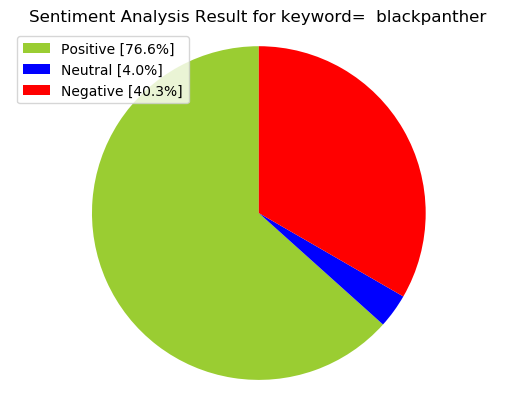

Overall Score 0.6130560596894534


In [93]:
url = 'https://www.imdb.com/title/tt1825683/reviews/?ref_=tt_ql_2'
keyword = 'blackpanther'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Avengers: Endgame (2019) - Avengers: Endgame (2019) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 381/381 [00:20<00:00, 18.66it/s]


nreview_title: Not as good as infinity war..
nAuthor: MoistMovies
nreview_date: 29 April 2019
nreview: But its a pretty good film. A bit of a mess in some parts, lacking the cohesive and effortless feel infinity war somehow managed to accomplish. Some silly plot holes and characters that could've been cut (Ahem, captain marvel and thanos). The use of Captain marvel in this film was just ridiculous. Shes there at the start, bails for some reason? And then pops up at the end to serve no purpose but deux ex machina a space ship...
nhelpfulness: 134 out of 205 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.65it/s]


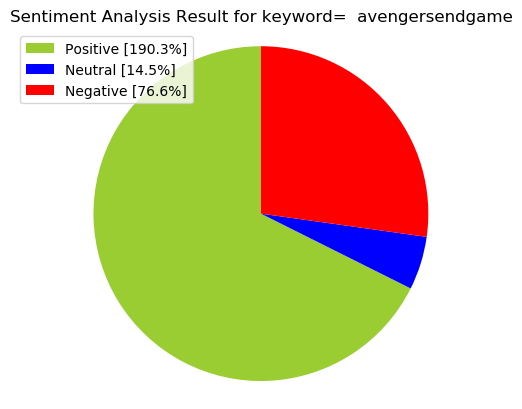

Overall Score 0.6569423439371692


In [94]:
url = 'https://www.imdb.com/title/tt4154796/reviews/?ref_=tt_ql_2'
keyword = 'avengersendgame'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Iron Man (2008) - Iron Man (2008) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 63/63 [00:04<00:00, 15.65it/s]


nreview_title: A Marvel superhero film done with class
nAuthor: TheLittleSongbird
nreview_date: 12 August 2014
nreview: When it comes to ranking the Marvel superhero(live action) films, Iron Man is for me up there with the better ones. It looks fabulous, the whole film is very slickly made with top-notch special effects(which look like time and effort was really put into it), awesome-looking futuristic gadgets and Iron Man's suit will be a guaranteed delight to anybody who is familiar or loves anything to do with the superhero. There is a pulsating soundtrack that adds much to the tension of the first half of the story and the enormously fun action sequences, which are exciting and tense with expertly choreography. The script crackles with smart humour that doesn't go overload, all of which is laugh-out-loud funny, yet the hostage plotting that takes up the first part of the film is intelligently written and somehow avoids being over-serious or over-familiar. The story has enough to al

100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 58.80it/s]


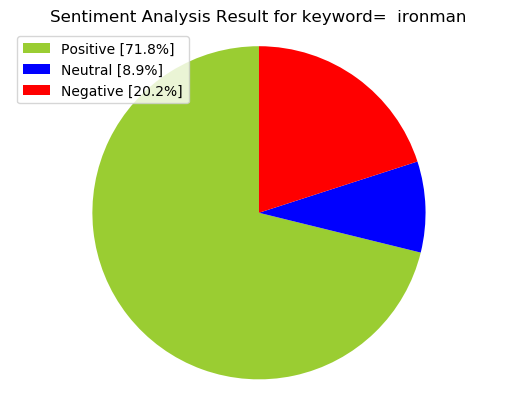

Overall Score 0.7170055456626813


In [95]:
url = 'https://www.imdb.com/title/tt0371746/reviews/?ref_=tt_ql_2'
keyword = 'ironman'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Thor: Ragnarok (2017) - Thor: Ragnarok (2017) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:03<00:00, 19.62it/s]


nreview_title: Best Movie in THOR series
nAuthor: MrHeraclius
nreview_date: 23 February 2020
nreview: The cast for Thor Ragnarok are all matched well, and the sibling chemistry between Tom Hiddleston and Chris Hemsworth is as natural as can be. Cate Blanchett as Hela, the goddess of death is frightening in her cruelty as well as physical perfection. But, the reason this movie stands alone is the multi talented Taika Waititi, the director of the film. His offbeat New Zealand style shows in every scene, humor throughout and a rocking 80s electronica soundtrack, the film will transport you as fast as Heimdall and the Bitfrost!
nhelpfulness: 95 out of 128 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 61.68it/s]


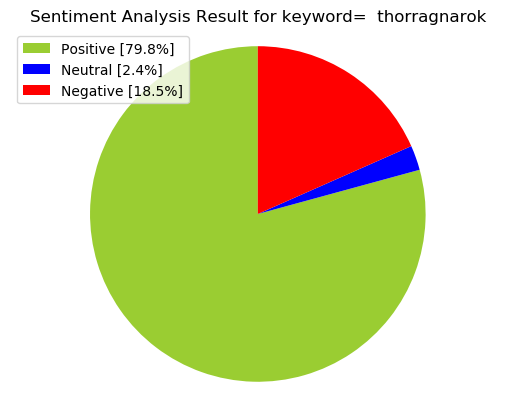

Overall Score 0.7701788986103963


In [96]:
url = 'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ql_2'
keyword = 'thorragnarok'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Spider-Man: No Way Home (2021) - Spider-Man: No Way Home (2021) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 245/245 [00:11<00:00, 20.59it/s]


nreview_title: Loved every second
nAuthor: Gordon-11
nreview_date: 15 December 2021
nreview: This Spiderman is really fantastic. It captivated me right from the start, and I was entranced every second. There's adventure, friendship, team spirit, love, empathy, and brotherhood. The people in the cinema clapped and cheered multiple times, at the appearance of key characters and at big hint of what the future holds for Spiderman. I loved every second of it!
nhelpfulness: 1,512 out of 1,991 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 59.17it/s]


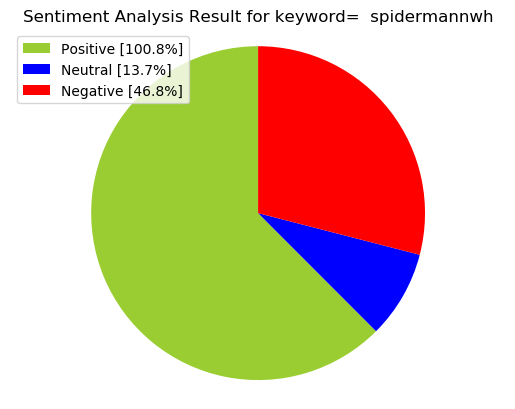

Overall Score 0.6576427589017371


In [97]:
url = 'https://www.imdb.com/title/tt10872600/reviews/?ref_=tt_ql_2'
keyword = 'spidermannwh'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Spider-Man: Homecoming (2017) - Spider-Man: Homecoming (2017) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [00:04<00:00, 13.25it/s]


nreview_title: Raimi's Spidey is still the best (not including Part 3).
nAuthor: BA_Harrison
nreview_date: 4 July 2019
nreview: I had a reasonably fun time with Spiderman Homecoming, but I have a few big issues that prevent me from loving it...
nhelpfulness: 54 out of 79 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 53.83it/s]


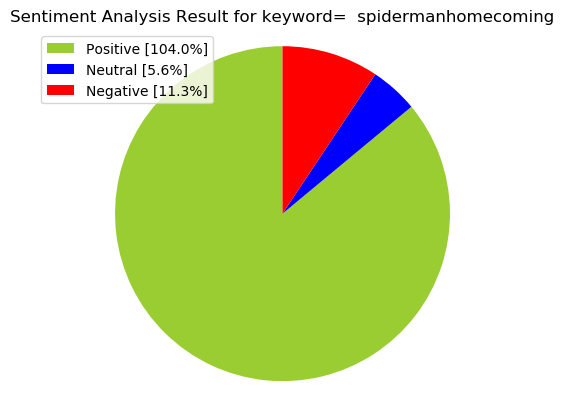

Overall Score 0.8147703095604584


In [98]:
url = 'https://www.imdb.com/title/tt2250912/reviews/?ref_=tt_ql_2'
keyword = 'spidermanhomecoming'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Guardians of the Galaxy (2014) - Guardians of the Galaxy (2014) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:03<00:00, 16.23it/s]


nreview_title: Guardians of Galaxy
nAuthor: auuwws
nreview_date: 2 November 2020
nreview: One of the funniest Marvel films is a comedy movie with distinction. A simple story. All the heroes of the film were excellent, especially Drax, Rocket, Groot, and Alcmestri among the heroes of the film was excellent. The music scene was great, especially Come And Get Your Love.
nhelpfulness: 62 out of 67 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 149/149 [00:02<00:00, 64.25it/s]


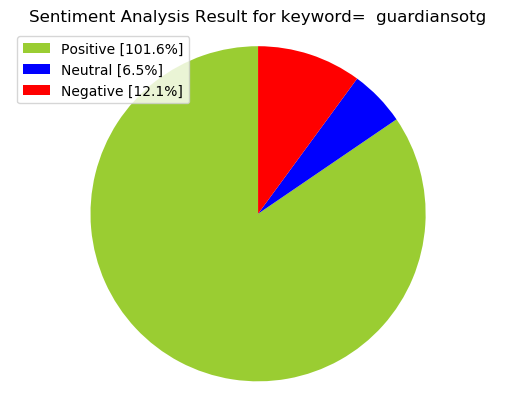

Overall Score 0.8147617384478467


In [99]:
url = 'https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ql_2'
keyword = 'guardiansotg'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

The Avengers (2012) - The Avengers (2012) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 84/84 [00:04<00:00, 17.13it/s]


nreview_title: Can't beat the originality of uniting a superhero team! Aside from Avengers 3 and Spider-Man 2, best superhero movie ever made!
nAuthor: SPZMaxinema
nreview_date: 21 August 2021
nreview: Up until this point, nothing had been done like this in film and it was executed magnificently. The casting and chemistry between them is on point, the villain is compelling and gets under your skin in the best way, and Robert Downey Jr.'s humor all around is unforgettable, and how can I not mention that glorifying theme song??
nhelpfulness: 23 out of 27 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:01<00:00, 63.83it/s]


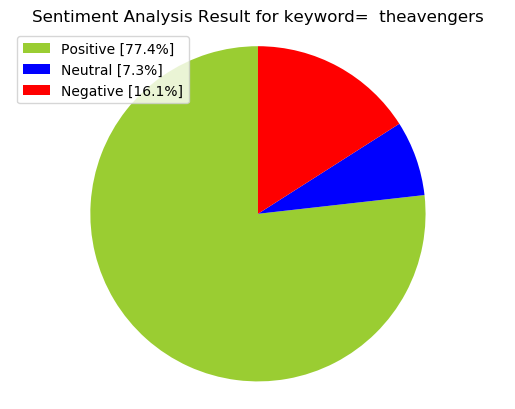

Overall Score 0.7574535690764475


In [100]:
url = 'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ql_2'
keyword = 'theavengers'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Shang-Chi and the Legend of the Ten Rings (2021) - Shang-Chi and the Legend of the Ten Rings (2021) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.74it/s]


nreview_title: Sort of disappointed..
nAuthor: daisukereds
nreview_date: 16 September 2021
nreview: I got to admit I wasn't particularly blown away by anything in the movie.. I might even say "I was bored" by it.
nhelpfulness: 255 out of 397 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 63.36it/s]


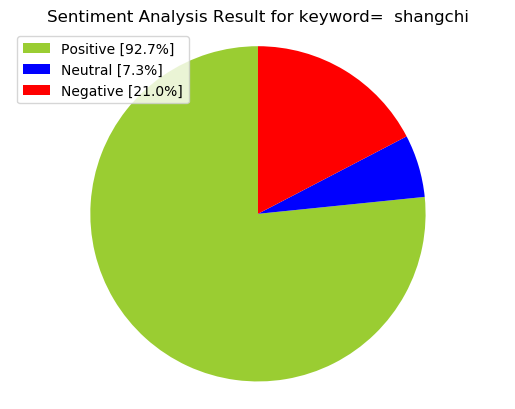

Overall Score 0.7329489196825881


In [101]:
url = 'https://www.imdb.com/title/tt9376612/reviews/?ref_=tt_ql_2'
keyword = 'shangchi'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Spider-Man: Far from Home (2019) - Spider-Man: Far from Home (2019) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:04<00:00, 18.43it/s]


nreview_title: A step backwards
nAuthor: Leofwine_draca
nreview_date: 12 April 2020
nreview: And so my long Marvel-watching journey comes to an end; I've finally caught up with the endless franchise, after what seems like eons playing catch-up with the rest of the world's population. Sadly, this SPIDER-MAN sequel is a real step down from the highs of AVENGERS: ENDGAME, and a feeling like they've gone backwards given how they learnt what worked so well previously. Personally, I've found both of Holland's outings as the web-slinging hero to be middling at best.
nhelpfulness: 125 out of 168 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 59.13it/s]


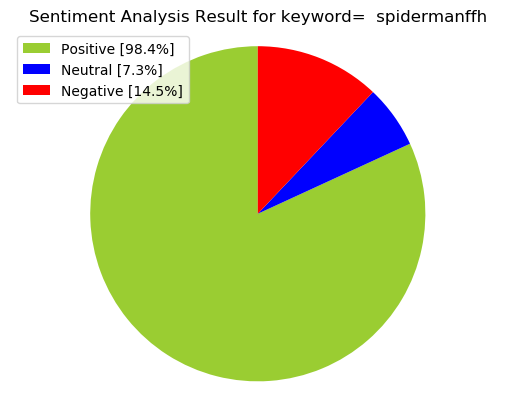

Overall Score 0.814037011968544


In [102]:
url = 'https://www.imdb.com/title/tt6320628/reviews/?ref_=tt_ql_2'
keyword = 'spidermanffh'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Captain America: Civil War (2016) - Captain America: Civil War (2016) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:04<00:00, 15.34it/s]


nreview_title: A master class in screenwriting
nAuthor: AlsExGal
nreview_date: 30 July 2021
nreview: What impresses me about this movie is how much good was done in a short amount of time for each character. There are really clever time-saving 'tricks' like Tony using the broom to bust open the hatch that caused the Spidey costume to come dangling down. That saved them minutes of precious dialogue; it just cut straight to the point. And during that whole scene in Peter's place, almost every line of dialogue counted toward something important, with just enough 'fluff' to make it sound like a real conversation instead of 'movie dialogue' (the funny asides like 'please move your leg' and 'your ridiculously hot aunt'), etc.
nhelpfulness: 25 out of 28 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 54.54it/s]


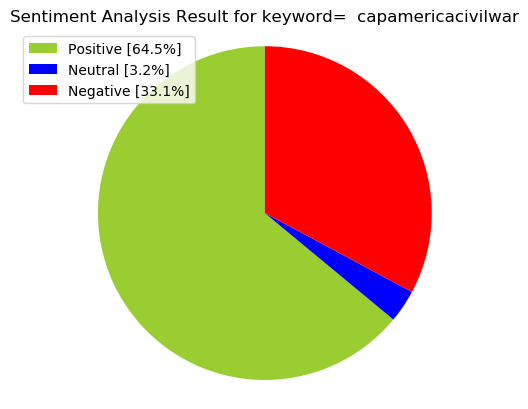

Overall Score 0.6537920225057771


In [103]:
url = 'https://www.imdb.com/title/tt3498820/reviews/?ref_=tt_ql_2'
keyword = 'capamericacivilwar'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Captain America: The Winter Soldier (2014) - Captain America: The Winter Soldier (2014) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:02<00:00, 15.61it/s]


nreview_title: On your left,,,
nAuthor: reddiemurf81
nreview_date: 8 August 2020
nreview: At the time this came out, it was without a doubt the best movie to come out of the MCU. I look forward to seeing more from the Russo bros.
nhelpfulness: 75 out of 82 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.20it/s]


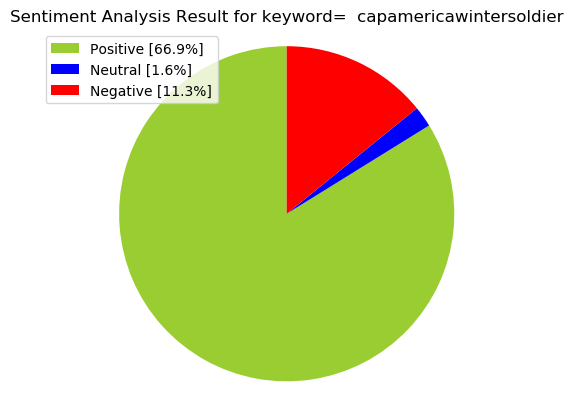

Overall Score 0.8063991983587405


In [104]:
url = 'https://www.imdb.com/title/tt1843866/reviews/?ref_=tt_ql_2'
keyword = 'capamericawintersoldier'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Doctor Strange (2016) - Doctor Strange (2016) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:03<00:00, 12.19it/s]


nreview_title: Great
nAuthor: MrHeraclius
nreview_date: 24 February 2020
nreview: I was not prepared for the visuals this movie offered. Nevertheless, I absorbed it in its full glory. It was easy to enjoy this movie not only because of its visuals but also because of the quirkiness and lovable characters. A must-watch!
nhelpfulness: 103 out of 118 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 51.58it/s]


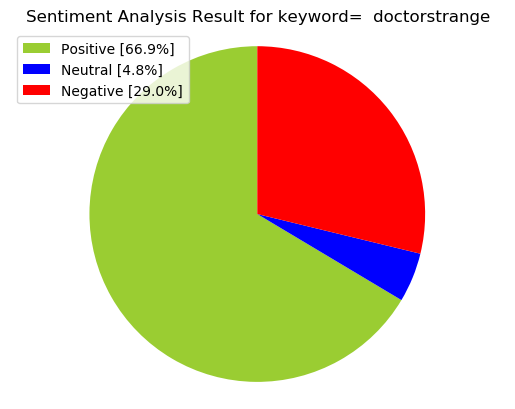

Overall Score 0.6778558210472801


In [105]:
url = 'https://www.imdb.com/title/tt1211837/reviews/?ref_=tt_ql_2'
keyword = 'doctorstrange'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Ant-Man and the Wasp (2018) - Ant-Man and the Wasp (2018) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00,  8.43it/s]


nreview_title: Ant-Man and the Wasp: On par sequel
nAuthor: Platypuschow
nreview_date: 9 November 2018
nreview: I love what Marvel have done in the creation of their "Universe" it's an overwhelming triumph and despite my fears they managed to slot Antman in there perfectly back in 2015.
nhelpfulness: 61 out of 87 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 175/175 [00:03<00:00, 45.18it/s]


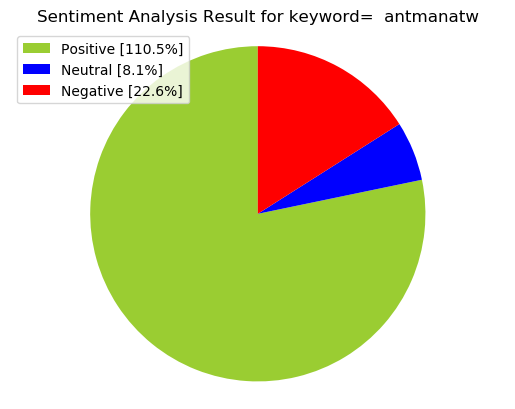

Overall Score 0.7397212400416674


In [106]:
url = 'https://www.imdb.com/title/tt5095030/reviews/?ref_=tt_ql_2'
keyword = 'antmanatw'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Avengers: Infinity War (2018) - Avengers: Infinity War (2018) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 183/183 [00:09<00:00, 18.40it/s]


nreview_title: Best movie of the MCU, incredible from start to finish.
nAuthor: RJBrez
nreview_date: 24 January 2021
nreview: Infinity War is remembered mostly for how it ends, with good reason. But for me, the entire movie is incredible. Action, humor, cinematography, heartbreak, etc. It was a culmination of 10 years of character development. The benefit of that hard work? The movie can start with incredible action and never let up. Most wouldn't agree because of the ending, but I feel it's the best movie of the MCU (so far). Endgame was awesome, infinity war was better. I think the best part of it was the fact that we had so many cool character meet ups that as fans we never thought we'd see. Thor with the guardians? Wow. Star Lord and Iron Man? Rocket and the winter soldier? We could go on and on. They also mastered the art of humor to help offset some deep deep hurt throughout the story. Thor and Star Lords interactions are pure gold. Thor calling Rocket "rabbit" pure gold. Dr Stra

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 52.03it/s]


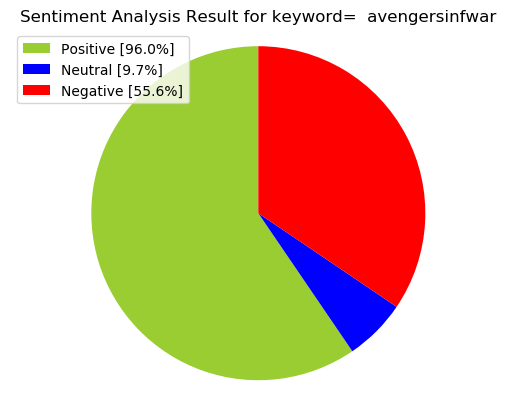

Overall Score 0.606910140562249


In [107]:
url = 'https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ql_2'
keyword = 'avengersinfwar'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Guardians of the Galaxy Vol. 2 (2017) - Guardians of the Galaxy Vol. 2 (2017) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:02<00:00, 18.30it/s]


nreview_title: Guardians of the Galaxy Vol. 2: Exceeds already high expectations
nAuthor: Platypuschow
nreview_date: 25 March 2018
nreview: Despite being a huge comic book nerd I was not familiar with the Guardians before the first movie came out. I did some googling and upon learning about this sci-fi superhero team consisting of a talking raccoon and tree man I was hardly impressed.
nhelpfulness: 108 out of 136 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:01<00:00, 70.00it/s]


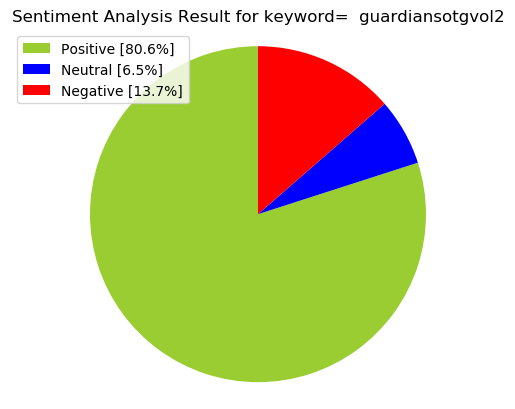

Overall Score 0.7719190468758129


In [108]:
url = 'https://www.imdb.com/title/tt3896198/reviews/?ref_=tt_ql_2'
keyword = 'guardiansotgvol2'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Black Panther: Wakanda Forever (2022) - Black Panther: Wakanda Forever (2022) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [00:03<00:00, 18.27it/s]


nreview_title: Not what I expected...
nAuthor: Drawmort
nreview_date: 14 November 2022
nreview: I am conflicted with this film and with Marvel.
nhelpfulness: 662 out of 803 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 62.87it/s]


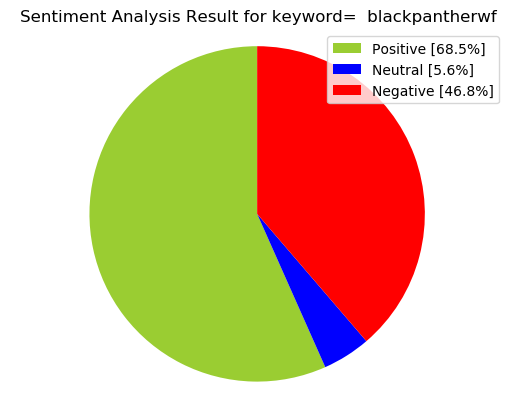

Overall Score 0.5750232901042192


In [109]:
url = 'https://www.imdb.com/title/tt9114286/reviews/?ref_=tt_ql_2'
keyword = 'blackpantherwf'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Ant-Man and the Wasp: Quantumania (2023) - Ant-Man and the Wasp: Quantumania (2023) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:02<00:00, 15.09it/s]


nreview_title: A mixed bag
nAuthor: cardsrock
nreview_date: 17 February 2023
nreview: After most entries in Phase 4 passed by without doing much to set up the next big bad in the MCU, I was eagerly anticipating this film given it would be the big screen introduction of Kang. While Majors shines as Kang, the rest of the film and even some of the narrative choices with Kang leave a bit of a "meh" feeling.
nhelpfulness: 254 out of 317 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 61.25it/s]


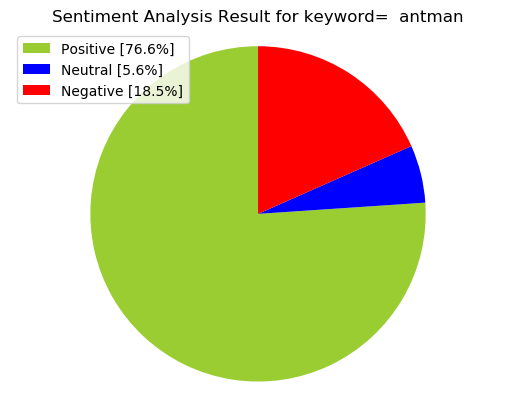

Overall Score 0.7427226411249235


In [110]:
url = 'https://www.imdb.com/title/tt10954600/reviews?ref_=tturv_ql_3'
keyword = 'antman'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Captain America: The First Avenger (2011) - Captain America: The First Avenger (2011) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:03<00:00, 13.15it/s]


nreview_title: It's a good, action packed film.
nAuthor: Sleepin_Dragon
nreview_date: 1 August 2022
nreview: Having been refused several times for The Army, Steve Rogers is finally successful, once there he takes part in a project and becomes Captain America.
nhelpfulness: 12 out of 13 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 47.19it/s]


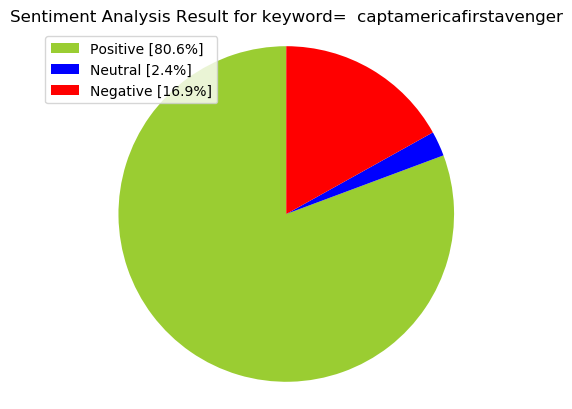

Overall Score 0.7828516689288109


In [111]:
url = 'https://www.imdb.com/title/tt0458339/reviews/?ref_=tt_ql_2'
keyword = 'captamericafirstavenger'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Captain Marvel (2019) - Captain Marvel (2019) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 296/296 [00:13<00:00, 22.50it/s]


nreview_title: Captain Meh.
nAuthor: morrison-dylan-fan
nreview_date: 22 March 2019
nreview: Travelling to Birmingham to get Easter presents for friends and family,I decided that whilst in the city I would go catch a film. Visiting the oldest working cinema in the UK (The Electric) I found a flick with a run time that would give me just enough time to catch the train home,so I get set to see the new captain of the MCU.
nhelpfulness: 77 out of 122 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 58.14it/s]


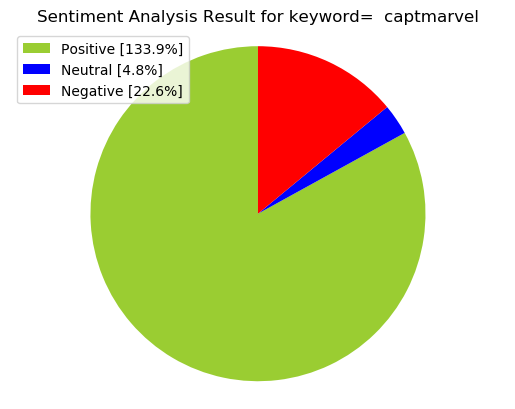

Overall Score 0.7812885579699135


In [112]:
url = 'https://www.imdb.com/title/tt4154664/reviews/?ref_=tt_ql_2'
keyword = 'captmarvel'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Black Widow (2021) - Black Widow (2021) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 122/122 [00:05<00:00, 22.22it/s]


nreview_title: Why wasn't she given a movie back in 2011 or 2012?
nAuthor: cricketbat
nreview_date: 7 November 2021
nreview: After all these years, Black Widow finally gets her own standalone movie and... it's okay. I actually found Florence Pugh, David Harbour, and Rachel Weisz to be entertaining additions, but the story felt cobbled together and it was riddled with plot holes. I know Natasha is a very skilled assassin, for instance, but she's almost invulnerable in this. It probably would have been better to give Black Widow her solo film a year or two after Iron Man 2 came out.
nhelpfulness: 73 out of 86 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 61.39it/s]


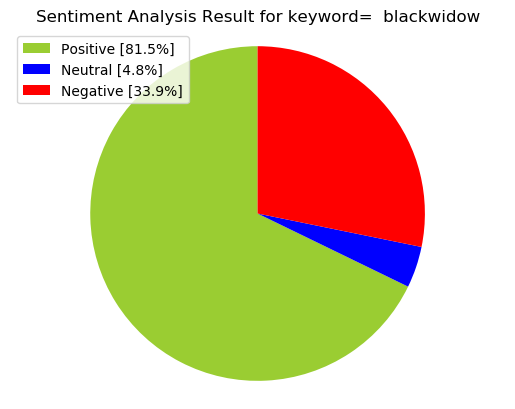

Overall Score 0.6911631122819983


In [113]:
url = 'https://www.imdb.com/title/tt3480822/reviews/?ref_=tt_ql_2'
keyword = 'blackwidow'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Iron Man 3 (2013) - Iron Man 3 (2013) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:02<00:00, 19.42it/s]


nreview_title: 🌠 RDJ Is His Entirely { Expected } Utterly Spectacular Self, Along With ( Every ) Other Principal.. But Kingsley & Paltrow { -"Dazzle"- } ..With A Sheerly Blinding Light 🌠 .
nAuthor: Radio-1s_Mr-MovieMad-Ami_104-1FM
nreview_date: 26 March 2020
nreview: " A { - Mini - } Review " .
nhelpfulness: 145 out of 196 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.78it/s]


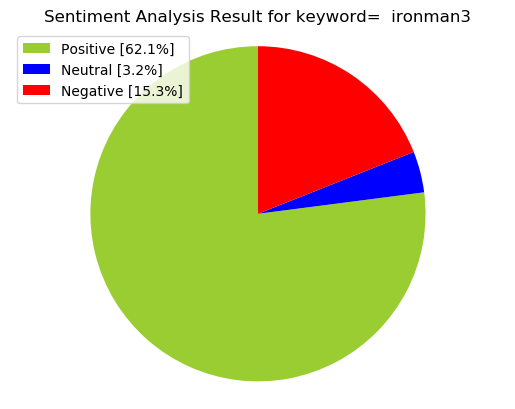

Overall Score 0.7553148460242073


In [114]:
url = 'https://www.imdb.com/title/tt1300854/reviews/?ref_=tt_ql_2'
keyword = 'ironman3'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Thor (2011) - Thor (2011) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 39.17it/s]


nreview_title: Thor
nAuthor: MrHeraclius
nreview_date: 24 February 2020
nreview: Thor is a film that takes risks - and they pay off wonderfully. The movie grounds itself in reality while keeping a mythological and fantasy-esqe tone, and it never loses sight of the humanity within the characters, with elevates this above standard superhero fare.
nhelpfulness: 54 out of 72 found this helpful.


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 98.19it/s]


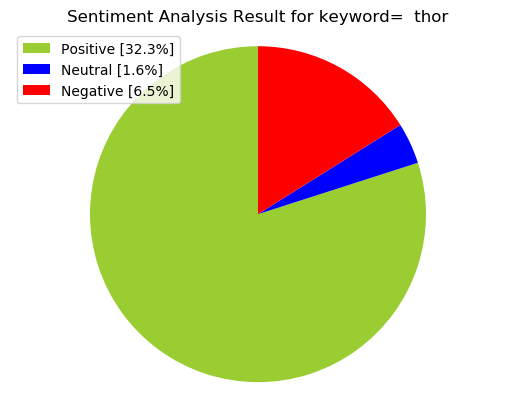

Overall Score 0.7987861242318044


In [116]:
url = 'https://www.imdb.com/title/tt0800369/reviews/?ref_=tt_ql_2'
keyword = 'thor'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Avengers: Age of Ultron (2015) - Avengers: Age of Ultron (2015) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [00:01<00:00, 43.28it/s]


nreview_title: The most important film in MCU
nAuthor: Abdulxoxo
nreview_date: 2 December 2020
nreview: As I was watching this movie today, I realized it's one of the most important film in mcu. It has tons of elements that are used heavily in future MCU films, eg
nhelpfulness: 30 out of 30 found this helpful.


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 96.74it/s]


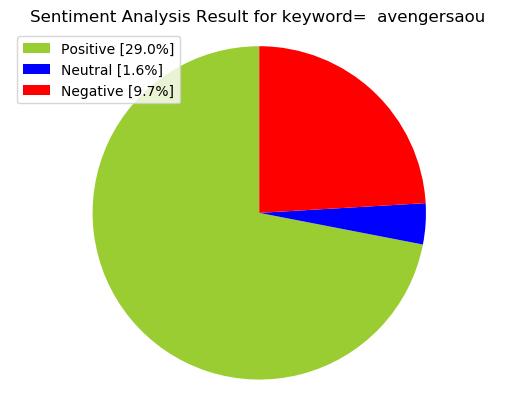

Overall Score 0.6650169456176026


In [117]:
url = 'https://www.imdb.com/title/tt2395427/reviews/?ref_=tt_ql_2'
keyword = 'avengersaou'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Iron Man 2 (2010) - Iron Man 2 (2010) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:01<00:00, 35.12it/s]


nreview_title: Awesome suits
nAuthor: MrHeraclius
nreview_date: 24 February 2020
nreview: This movie contains some throughly enjoyable moments that are on par with some of Downey Jnr's highlights as Tony Stark. The relationship between Pepper and Tony is taken further and built upon brilliantly in this movie. It contains some really cool and innovative action scenes which are taken for granted now. However the poor villain, a pattern in Iron Man Solo Outings, and the lack of direction meant this is easily the poorest Iron Man Performance. It's still an entertaining watch but you wouldn't be wrong if you skipped this movie when rewatching MCU Classics.
nhelpfulness: 26 out of 35 found this helpful.


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 95.31it/s]


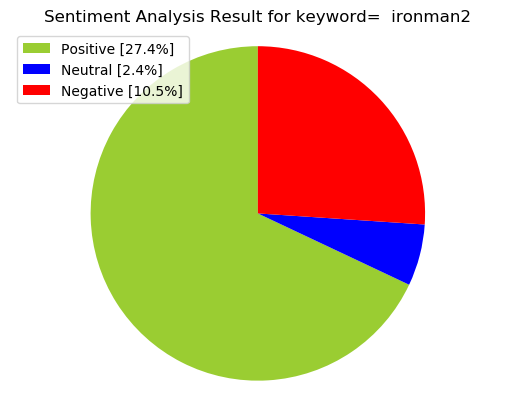

Overall Score 0.6640014107214834


In [118]:
url = 'https://www.imdb.com/title/tt1228705/reviews/?ref_=tt_ql_2'
keyword = 'ironman2'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Doctor Strange in the Multiverse of Madness (2022) - Doctor Strange in the Multiverse of Madness (2022) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 159/159 [00:03<00:00, 45.56it/s]


nreview_title: This was Wandavision 2, not Doctor Strange 2
nAuthor: briancham1994
nreview_date: 14 May 2022
nreview: I liked this movie and I think it's a fine addition to the Marvel Cinematic Universe. It has the distinct directorial style of Sam Raimi with some quirky camera choices, horror elements and quick montages. The fight scenes and magic are more creative than in previous films, such as the musical battle. The visual design of the universes are very distinct and feels like other worlds have really come to life. It was very exciting to explore other worlds and other versions of Dr. Strange. Scarlet Witch has a truly terrifying presence.
nhelpfulness: 987 out of 1,157 found this helpful.


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 109.65it/s]


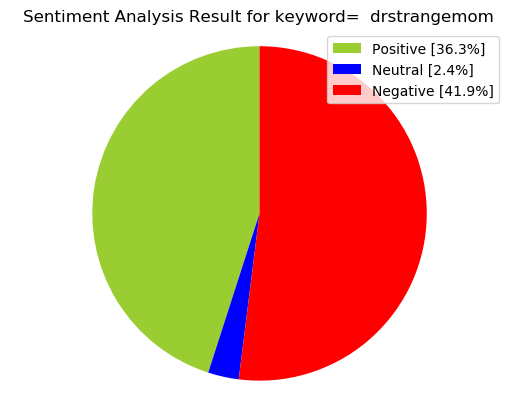

Overall Score 0.4768132809351069


In [119]:
url = 'https://www.imdb.com/title/tt9419884/reviews/?ref_=tt_ql_2'
keyword = 'drstrangemom'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

The Incredible Hulk (2008) - The Incredible Hulk (2008) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 37.75it/s]


nreview_title: An MCU film that deserved better at the box office
nAuthor: gavin-thelordofthefu-48-460297
nreview_date: 2 May 2020
nreview: The Incredible Hulk, based on another marvel superhero and also the 1970s TV show, revolves around Bruce Banner becoming a fugitive after his science experiment exposes gamma radiation on him which transforms him into the Hulk which becomes his appearance for brief periods of time. Meanwhile, General Ross and his army including Emil Blonsky tracks down Bruce and little does he know that Emil decides to use a serum that would give him some abilities while also transforming him into an even worse creature imaginable.
nhelpfulness: 65 out of 72 found this helpful.


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.07it/s]


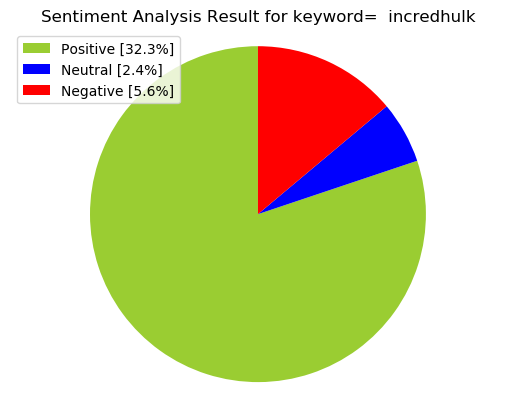

Overall Score 0.7702765813917286


In [120]:
url = 'https://www.imdb.com/title/tt0800080/reviews/?ref_=tt_ql_2'
keyword = 'incredhulk'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Thor: The Dark World (2013) - Thor: The Dark World (2013) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 34.85it/s]


nreview_title: Thor
nAuthor: MrHeraclius
nreview_date: 24 February 2020
nreview: Is this a huge stepup from the original "Thor" movie. No, unfortunately not. Is it another watchable, fun superhero movie; yes, definitely. It's a really good movie and if we look at the way Alan Taylor directs this movie, it's actually not that much different from what Branagh did back in 2011. Chris Hemsworth is good as usual and Tom Hiddleston is more wonderful than ever as Loki, but the villain Malekith, played by Christopher Eccleston, unfortunately, is a bit of a disappointment, mostly because of the lack of motivation.
nhelpfulness: 39 out of 51 found this helpful.


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 83.53it/s]


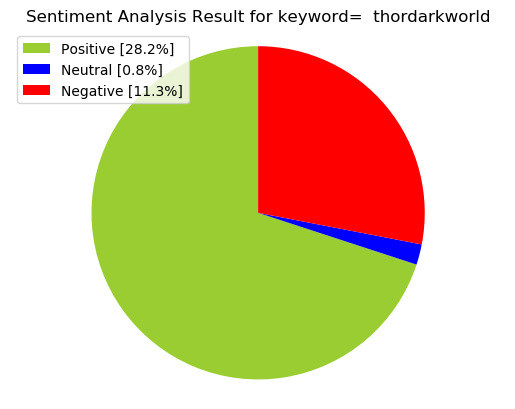

Overall Score 0.6771549380851707


In [121]:
url = 'https://www.imdb.com/title/tt1981115/reviews/?ref_=tt_ql_2'
keyword = 'thordarkworld'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Thor: Love and Thunder (2022) - Thor: Love and Thunder (2022) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 166/166 [00:04<00:00, 37.60it/s]


nreview_title: Enjoyable but empty
nAuthor: masonsaul
nreview_date: 7 July 2022
nreview: Thor: Love and Thunder does attempt to explore themes of love and loss whilst introducing the Mighty Thor and putting Thor on a journey of self discovery. However, it sadly doesn't work as well as it should due to a rushed pace and way too many jokes that are almost never funny.
nhelpfulness: 1,814 out of 2,223 found this helpful.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 97.41it/s]


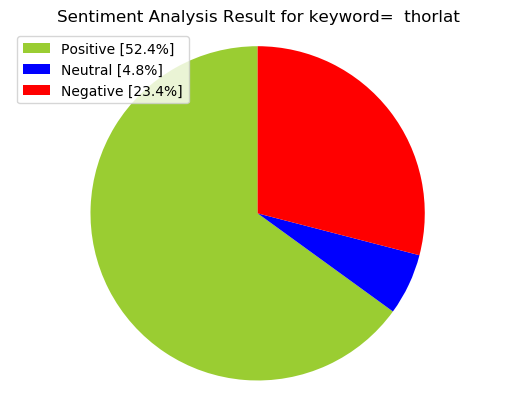

Overall Score 0.6547963596138376


In [122]:
url = 'https://www.imdb.com/title/tt10648342/reviews/?ref_=tt_ql_2'
keyword = 'thorlat'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Ant-Man and the Wasp: Quantumania (2023) - Ant-Man and the Wasp: Quantumania (2023) - User Reviews - IMDb


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 31.50it/s]


nreview_title: A mixed bag
nAuthor: cardsrock
nreview_date: 17 February 2023
nreview: After most entries in Phase 4 passed by without doing much to set up the next big bad in the MCU, I was eagerly anticipating this film given it would be the big screen introduction of Kang. While Majors shines as Kang, the rest of the film and even some of the narrative choices with Kang leave a bit of a "meh" feeling.
nhelpfulness: 254 out of 317 found this helpful.


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 92.68it/s]


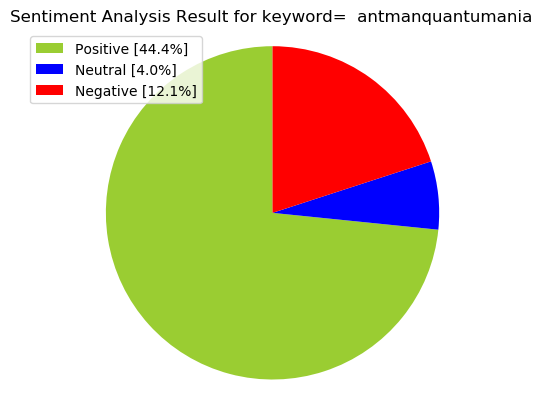

Overall Score 0.747877861558318


In [123]:
url = 'https://www.imdb.com/title/tt10954600/reviews/?ref_=tt_ql_2'
keyword = 'antmanquantumania'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

Eternals (2021) - Eternals (2021) - User Reviews - IMDb


100%|████████████████████████████████████████████████████████████████████████████████| 148/148 [00:03<00:00, 38.03it/s]


nreview_title: Dire.
nAuthor: Sleepin_Dragon
nreview_date: 11 December 2021
nreview: I've read several critical reviews applauding this film, however having sat through it twice I have to point out that this is a very poor film.
nhelpfulness: 1,904 out of 2,631 found this helpful.


100%|███████████████████████████████████████████████████████████████████████████████| 174/174 [00:01<00:00, 102.06it/s]


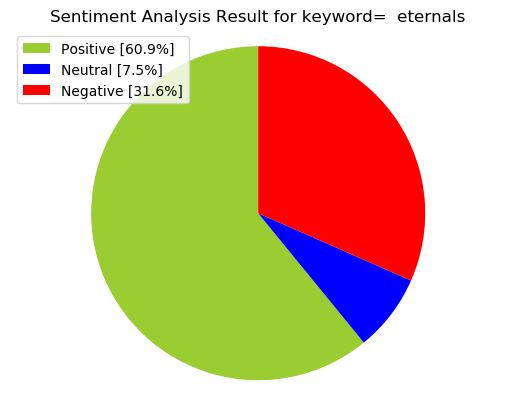

Overall Score 0.6213504937346142


In [150]:
url = 'https://www.imdb.com/title/tt9032400/reviews/?ref_=tt_ql_2'
keyword = 'eternals'
textIMDB, negative_list, neutral_list, positive_list, comp_list, polarityList = sentiment(url, keyword)

# normalizing the compound list and taking the average
newComp = NormalizeData(comp_list)
overallComp = np.mean(newComp)
print('Overall Score', overallComp)
scoreAlgorithm.append(overallComp)

In [151]:
# textEternals = pd.DataFrame(textIMDB)
# textEternals.to_csv('textEternals.csv')
dfReviewLabeled = pd.read_csv('textEternals.csv')
dfReviewLabeled

,Review,Polarity
0,I've read several critical reviews applauding ...,Neg
1,Shang-Chi gave me hope for Phase 4 of Marvel. ...,Neg
2,"Another year, another Marvel Studios superhero...",Pos
3,The Eternals are immortals created to eliminat...,Neu
4,I'm not going to give a long winded review tho...,Neg
...,...,...
119,'Eternals' is boring. There's no introduction ...,Neg
120,"Yes I know its part of the mcu, but if you loo...",Pos
121,I don't understand why people like to review b...,Pos
122,This one-of-a-kind movie is a story like an od...,Pos


In [152]:
textEternals = pd.DataFrame(textIMDB)
textEternals = textEternals.iloc[0:124]
textEternals

,0
0,I've read several critical reviews applauding ...
1,Shang-Chi gave me hope for Phase 4 of Marvel. ...
2,"Another year, another Marvel Studios superhero..."
3,The Eternals are immortals created to eliminat...
4,I'm not going to give a long winded review tho...
...,...
119,'Eternals' is boring. There's no introduction ...
120,"Yes I know its part of the mcu, but if you loo..."
121,I don't understand why people like to review b...
122,This one-of-a-kind movie is a story like an od...


In [153]:
NegLabeled = dfReviewLabeled.loc[dfReviewLabeled['Polarity'] == 'Neg']
NegLabeledText = np.array(NegLabeled['Review'])
PosLabeled = dfReviewLabeled.loc[dfReviewLabeled['Polarity'] == 'Pos']
PosLabeledText = np.array(PosLabeled['Review'])
NeuLabeled = dfReviewLabeled.loc[dfReviewLabeled['Polarity'] == 'Neu']
NeuLabeledText = np.array(NeuLabeled['Review'])
# NeuLabeledText

In [154]:
incorrect = 0
total = 0
for i in NegLabeledText:
    if i not in negative_list:
        incorrect += 1
        total += 1
        
print(len(NegLabeledText), len(negative_list), incorrect)

incorrect = 0
for i in NeuLabeledText:
    if i not in neutral_list:
        incorrect += 1
        total += 1
        
print(len(NeuLabeledText), len(neutral_list), incorrect)

incorrect = 0
for i in PosLabeledText:
    if i not in positive_list:
        incorrect += 1
        total += 1
        
print(len(PosLabeledText), len(positive_list), incorrect)
print(len(textIMDB), total)
print('accuracy =', 1 - total/124)

67 55 33
15 13 9
42 106 7
174 49
accuracy = 0.6048387096774194


In [155]:
# negative_list
# neutral_list
# positive_list

In [156]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(list(dfReviewLabeled['Polarity']), polarityList[0:124])
accuracy

0.4838709677419355

In [157]:
print(classification_report(list(dfReviewLabeled['Polarity']), polarityList[0:124]))


              precision    recall  f1-score   support

         Neg       0.64      0.40      0.50        67
         Neu       0.44      0.27      0.33        15
         Pos       0.40      0.69      0.50        42

    accuracy                           0.48       124
   macro avg       0.49      0.45      0.44       124
weighted avg       0.54      0.48      0.48       124



In [169]:
RT['scoreAlgorithm'] = scoreAlgorithm[0:31]

In [177]:
RT['Algorithm vs IMDB'] = RT['scoreIMDB'] - RT['scoreAlgorithm']
RT['Algorithm vs RT'] = RT['scoreRT'] - RT['scoreAlgorithm']
RT

,movie,scoreRT,scoreIMDB,scoreAlgorithm,Algorithm vs IMDB,Algorithm vs RT
0,Black Panther,0.96,0.73,0.613056,0.116944,0.346944
1,Avengers: Endgame,0.94,0.84,0.656942,0.183058,0.283058
2,Iron Man,0.94,0.79,0.717006,0.072994,0.222994
3,Thor: Ragnarok,0.93,0.79,0.770179,0.019821,0.159821
4,Spider-man: No Way Home,0.93,0.82,0.657643,0.162357,0.272357
5,Spider-man: Homecoming,0.92,0.74,0.814770,-0.074770,0.105230
6,Guardians of the Galaxy,0.92,0.80,0.814762,-0.014762,0.105238
7,The Avengers,0.91,0.80,0.757454,0.042546,0.152546
8,Shang-Chi and the Legend of the Ten Rings,0.91,0.74,0.732949,0.007051,0.177051
9,Spider-man: Far From Home,0.90,0.74,0.814037,-0.074037,0.085963


In [178]:
RT
algVSIMDB = np.mean(RT['Algorithm vs IMDB'])
algVSRT = np.mean(RT['Algorithm vs RT'])
print('avediff alg vs IMDB =', algVSIMDB)
      
print('avediff alg vs RT =', algVSRT)

avediff alg vs IMDB = 0.01924002900636994
avediff alg vs RT = 0.1047238999741119
